# Unpolarized radiative cylindrical spacetimes: Trapped surfaces and quasilocal energy by Gonclaves
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  December 29, 2021 

Here we work with Metric 32 the polarized verion of Jordan-Ehlers-Kundt-Kompaneets metric.  Other metric to go back and redo are metric 1 the JEKK metric and metric 21 in Bondi coordinates

https://arxiv.org/abs/gr-qc/0212125

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,r,phi,z,dt,dr,dphi,dz = symbols('t r phi z dt dr dphi dz')

In [4]:
psi = Function('psi')(r,t)
psi

In [5]:
omega = Function('omega')(r,t)
omega

In [6]:
gamma = Function('gamma')(r,t)
gamma

In [7]:
variables = Matrix([t,r,phi,z])
variables

⎡t⎤
⎢ ⎥
⎢r⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [8]:
differentials = Matrix([dt,dr,dphi,dz])
differentials 

⎡ dt ⎤
⎢    ⎥
⎢ dr ⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [9]:
lineElement = expand(-exp(2*(gamma-psi)) * (dt**2 - dr**2 ) + exp(2*psi) *dz**2 + r**2 * exp(-2*psi) *dphi**2)
lineElement

In [10]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  2⋅γ(r, t)  -2⋅ψ(r, t)                                                    ⎤
⎢-ℯ         ⋅ℯ                      0                   0             0     ⎥
⎢                                                                           ⎥
⎢                          2⋅γ(r, t)  -2⋅ψ(r, t)                            ⎥
⎢           0             ℯ         ⋅ℯ                  0             0     ⎥
⎢                                                                           ⎥
⎢                                                  2  -2⋅ψ(r, t)            ⎥
⎢           0                       0             r ⋅ℯ                0     ⎥
⎢                                                                           ⎥
⎢                                                                  2⋅ψ(r, t)⎥
⎣           0                       0                   0         ℯ         ⎦

In [11]:
import sympy

In [12]:
m = sympy.Array(g)
m

⎡  2⋅γ(r, t)  -2⋅ψ(r, t)                                                    ⎤
⎢-ℯ         ⋅ℯ                      0                   0             0     ⎥
⎢                                                                           ⎥
⎢                          2⋅γ(r, t)  -2⋅ψ(r, t)                            ⎥
⎢           0             ℯ         ⋅ℯ                  0             0     ⎥
⎢                                                                           ⎥
⎢                                                  2  -2⋅ψ(r, t)            ⎥
⎢           0                       0             r ⋅ℯ                0     ⎥
⎢                                                                           ⎥
⎢                                                                  2⋅ψ(r, t)⎥
⎣           0                       0                   0         ℯ         ⎦

In [13]:
from einsteinpy.symbolic import *

In [14]:
syms = sympy.symbols("t r phi z")
t,r,phi,z = syms

In [15]:
metric = MetricTensor(m,syms)

In [16]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡∂             ∂            ∂             ∂                                                                            ⎤  ⎡∂            
⎢⎢──(γ(r, t)) - ──(ψ(r, t))  ──(γ(r, t)) - ──(ψ(r, t))               0                                0                 ⎥  ⎢──(γ(r, t)) -
⎢⎢∂t            ∂t           ∂r            ∂r                                                                           ⎥  ⎢∂r           
⎢⎢                                                                                                                      ⎥  ⎢             
⎢⎢∂             ∂            ∂             ∂                                                                            ⎥  ⎢∂            
⎢⎢──(γ(r, t)) - ──(ψ(r, t))  ──(γ(r, t)) - ──(ψ(r, t))               0                                0                 ⎥  ⎢──(γ(r, t)) -
⎢⎢∂r            ∂r           ∂t            ∂t                                                                           ⎥  ⎢∂t           
⎢⎢                                

In [17]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡  ⎛  2              2              2                           2     2         ⎞                                                        
⎢  ⎜ ∂              ∂              ∂               ⎛∂          ⎞     ∂          ⎟   ∂             ∂                                      
⎢r⋅⎜───(γ(r, t)) - ───(γ(r, t)) - ───(ψ(r, t)) - 2⋅⎜──(ψ(r, t))⎟  + ───(ψ(r, t))⎟ + ──(γ(r, t)) - ──(ψ(r, t))                            
⎢  ⎜  2              2              2              ⎝∂t         ⎠      2         ⎟   ∂r            ∂r                                     
⎢  ⎝∂r             ∂t             ∂r                                ∂t          ⎠                                                        
⎢────────────────────────────────────────────────────────────────────────────────────────────────────────────                            
⎢                                                     r                                                                                  
⎢                                 

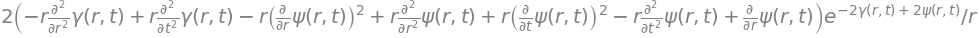

In [18]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [19]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡  ⎛  2              2              2                           2     2         ⎞                                   ⎛      2             
⎢  ⎜ ∂              ∂              ∂               ⎛∂          ⎞     ∂          ⎟   ∂             ∂                 ⎜     ∂              
⎢r⋅⎜───(γ(r, t)) - ───(γ(r, t)) - ───(ψ(r, t)) - 2⋅⎜──(ψ(r, t))⎟  + ───(ψ(r, t))⎟ + ──(γ(r, t)) - ──(ψ(r, t))   1.0⋅⎜- r⋅───(γ(r, t)) + r
⎢  ⎜  2              2              2              ⎝∂t         ⎠      2         ⎟   ∂r            ∂r                ⎜      2             
⎢  ⎝∂r             ∂t             ∂r                                ∂t          ⎠                                   ⎝    ∂r              
⎢──────────────────────────────────────────────────────────────────────────────────────────────────────────── + ─────────────────────────
⎢                                                     r                                                                                  
⎢                                 

In [20]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [21]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [22]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡    ⎛    2              2              2                           2     2         ⎞                                                    
⎢    ⎜   ∂              ∂              ∂               ⎛∂          ⎞     ∂          ⎟   ∂             ∂                                  
⎢- r⋅⎜- ───(γ(r, t)) + ───(γ(r, t)) + ───(ψ(r, t)) + 2⋅⎜──(ψ(r, t))⎟  - ───(ψ(r, t))⎟ + ──(γ(r, t)) - ──(ψ(r, t))                        
⎢    ⎜    2              2              2              ⎝∂t         ⎠      2         ⎟   ∂r            ∂r                                 
⎢    ⎝  ∂r             ∂t             ∂r                                ∂t          ⎠                                                    
⎢────────────────────────────────────────────────────────────────────────────────────────────────────────────────                        
⎢                                                       r                                                                                
⎢                                 

In [23]:
einsteinSimplifed = simplify(einst.tensor())
einsteinSimplifed

⎡                                        ∂                                               ∂                                               
⎢               2                2   1.0⋅──(γ(r, t))                                     ──(γ(r, t))                                     
⎢  ⎛∂          ⎞    ⎛∂          ⎞        ∂r                    ∂           ∂             ∂t                                              
⎢- ⎜──(ψ(r, t))⎟  - ⎜──(ψ(r, t))⎟  + ───────────────       - 2⋅──(ψ(r, t))⋅──(ψ(r, t)) + ───────────                                     
⎢  ⎝∂r         ⎠    ⎝∂t         ⎠           r                  ∂r          ∂t                 r                                          
⎢                                                                                                                                        
⎢                                   ∂                                                         ∂                                          
⎢                                 

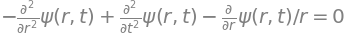

In [24]:
psiWave = Eq(expand((-1/r)*ricciSimplified[2,2].args[1]),0)
psiWave 

In [25]:
dgammadt = Eq(diff(gamma,t),solve( Ric.tensor()[0,1] , diff(gamma,t) )[0])
dgammadt

In [26]:
dgammadr = Eq( diff(gamma,r),solve( simplify( ricciSimplified[0,0].args[1] + ricciSimplified[1,1].args[1] ) , diff(gamma,r) )[0])
dgammadr

In [29]:
vacuumFieldEquations = Matrix([psiWave,dgammadt,dgammadr])
vacuumFieldEquations

⎡                                 ∂               ⎤
⎢     2              2            ──(ψ(r, t))     ⎥
⎢    ∂              ∂             ∂r              ⎥
⎢ - ───(ψ(r, t)) + ───(ψ(r, t)) - ─────────── = 0 ⎥
⎢     2              2                 r          ⎥
⎢   ∂r             ∂t                             ⎥
⎢                                                 ⎥
⎢    ∂                 ∂           ∂              ⎥
⎢    ──(γ(r, t)) = 2⋅r⋅──(ψ(r, t))⋅──(ψ(r, t))    ⎥
⎢    ∂t                ∂r          ∂t             ⎥
⎢                                                 ⎥
⎢                ⎛             2                2⎞⎥
⎢∂               ⎜⎛∂          ⎞    ⎛∂          ⎞ ⎟⎥
⎢──(γ(r, t)) = r⋅⎜⎜──(ψ(r, t))⎟  + ⎜──(ψ(r, t))⎟ ⎟⎥
⎣∂r              ⎝⎝∂r         ⎠    ⎝∂t         ⎠ ⎠⎦

In [31]:
X, Y = map(Function, 'XY')

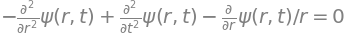

In [32]:
eq = vacuumFieldEquations[0]
eq

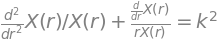

In [33]:
xODE = Eq(pde_separate( eq, psi, [X(r),Y(t)])[0] , k**2 ) 
xODE

In [35]:
xSolution = dsolve( xODE , X(r))
xSolution 

In [36]:
xSolutionParticular = xSolution.subs(xSolution.args[1].args[0].args[0],1).subs(xSolution.args[1].args[1].args[0],1)
xSolutionParticular

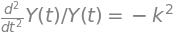

In [38]:
yODE = Eq( pde_separate( eq, psi, [X(r),Y(t)])[1] , - k**2 ) 
yODE

In [39]:
ySolution = dsolve( yODE , Y(t))
ySolution 

In [40]:
ySolutionParticular = ySolution.subs(ySolution.args[1].args[0].args[0],1).subs(ySolution.args[1].args[1].args[0],1)
ySolutionParticular

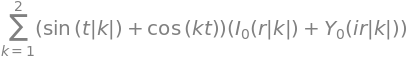

In [41]:
#  Here we arbitrary pick just two terms as an example... 
Sum( ( xSolutionParticular.args[1] * ySolutionParticular.args[1] ) ,(k,1,2) )

In [42]:
psiSumTwoTerms = Eq(psi, Sum( ( xSolutionParticular.args[1] * ySolutionParticular.args[1] ) ,(k,1,2) ).doit() ) 
psiSumTwoTerms

In [43]:
expand( Sum( ( xSolutionParticular.args[1] * ySolutionParticular.args[1] ) ,(k,1,2) ).doit() ) 

In [45]:
dgammadrPDE = vacuumFieldEquations[2].subs(psiSumTwoTerms.args[0],psiSumTwoTerms.args[1])
dgammadrPDE

In [46]:
dgammadrPDE.doit()

In [48]:
#  expand(dgammadrPDE.doit())

In [ ]:
#  pdsolve( dgammadxPDE )

In [49]:
dgammadtPDE = vacuumFieldEquations[1].subs(psiSumTwoTerms.args[0],psiSumTwoTerms.args[1])
dgammadtPDE

In [50]:
dgammadtPDE.doit()

In [51]:
#  pdsolve( dgammadtPDE )